<a href="https://colab.research.google.com/github/PriyanshuJoshi1982/IPL-Prediction/blob/main/Model_3_Location_Team_Performance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Accuracy: 0.4680365296803653
Classification Report:
               precision    recall  f1-score   support

        Loss       0.47      0.97      0.63       204
         Won       0.53      0.03      0.06       234

    accuracy                           0.47       438
   macro avg       0.50      0.50      0.35       438
weighted avg       0.50      0.47      0.33       438



/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist

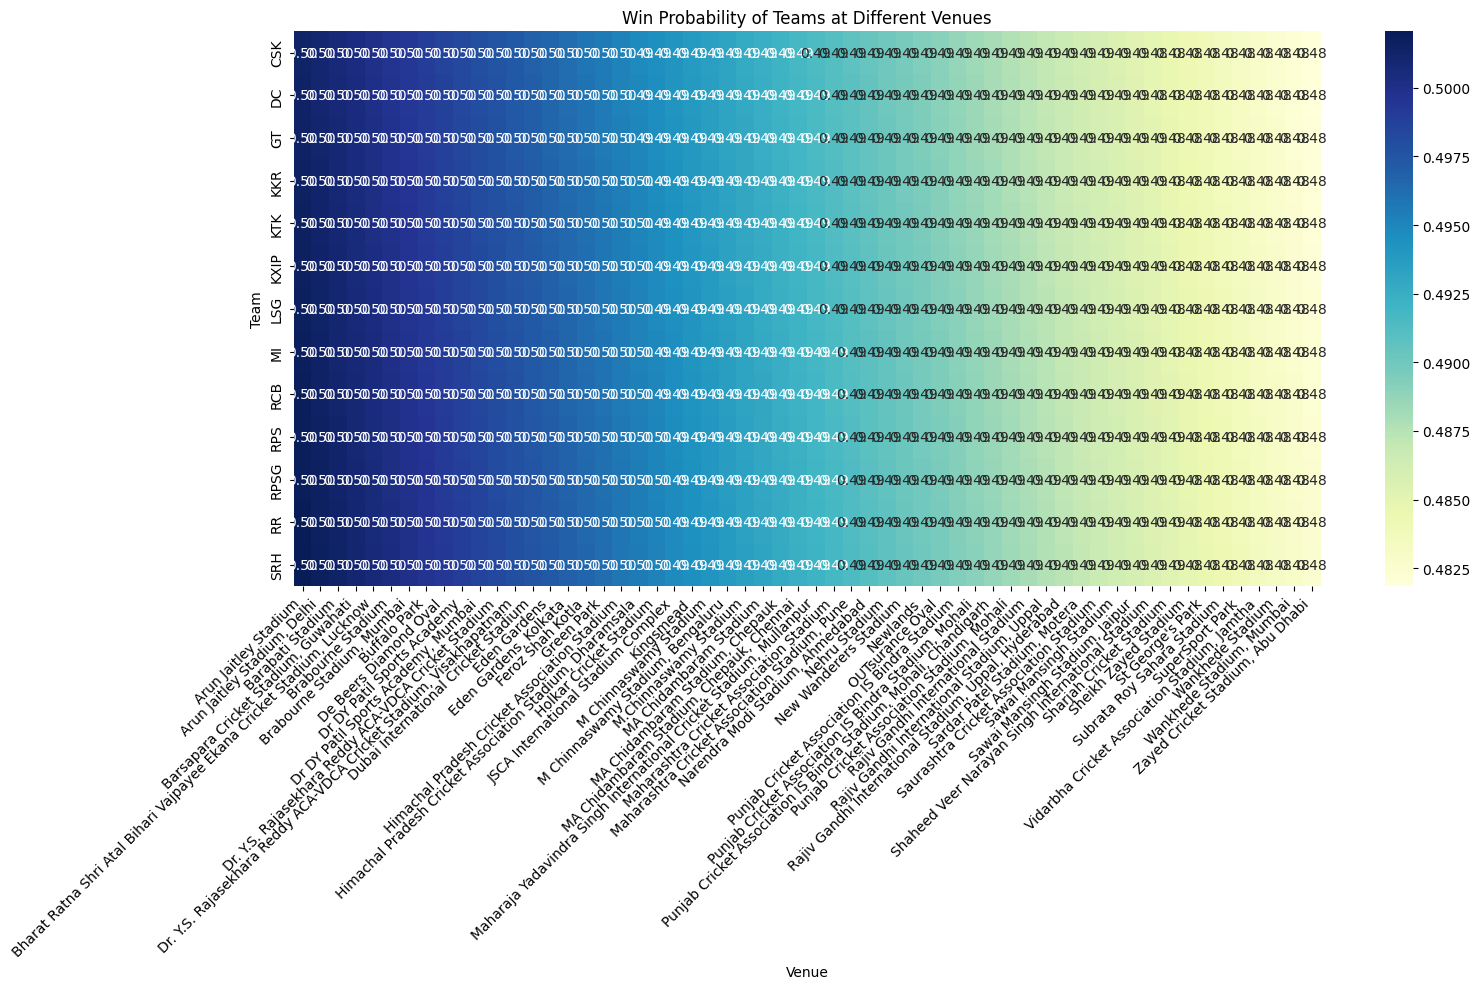

In [8]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

# Load your CSV file
df = pd.read_csv("M3_Location_Performance.csv")

# Encode the categorical features
le_venue = LabelEncoder()
le_team = LabelEncoder()
le_result = LabelEncoder()

df['venue_enc'] = le_venue.fit_transform(df['venue'])
df['team_enc'] = le_team.fit_transform(df['Team'])
df['result_enc'] = le_result.fit_transform(df['Result'])  # 'Won' -> 1, 'Loss' -> 0

# Split features and target
X = df[['venue_enc', 'team_enc']]
y = df['result_enc']

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Logistic Regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Evaluation
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred, target_names=le_result.classes_))

# Create win probability matrix
prob_matrix = pd.DataFrame(index=le_team.classes_, columns=le_venue.classes_)

for team in le_team.classes_:
    for venue in le_venue.classes_:
        venue_enc = le_venue.transform([venue])[0]
        team_enc = le_team.transform([team])[0]
        prob = model.predict_proba([[venue_enc, team_enc]])[0][1]  # Probability of win
        prob_matrix.loc[team, venue] = prob

# Plot heatmap
plt.figure(figsize=(16, 10))
sns.heatmap(prob_matrix.astype(float), annot=True, fmt=".2f", cmap="YlGnBu")
plt.title("Win Probability of Teams at Different Venues")
plt.xlabel("Venue")
plt.ylabel("Team")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


# New Section